In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mss
import cv2
from PIL import Image
import time
from time import sleep
# import schedule
import sched
import dxcam
import os
from PIL import Image

In [6]:
import keyboard
# print(keyboard.read_key())
print(keyboard.record("esc"))

[KeyboardEvent(a down), KeyboardEvent(a up), KeyboardEvent(shift down), KeyboardEvent(A down), KeyboardEvent(A up), KeyboardEvent(shift up), KeyboardEvent(s down), KeyboardEvent(s up), KeyboardEvent(esc down)]


In [6]:
images = []
try:
    del camera
except:
    pass
camera = dxcam.create(device_idx=0, output_idx=0)
frame = camera.grab(region=(0, 0, 1920, 1080))  # region
goal_fps = 60
seconds = 5
camera.start(target_fps=goal_fps,video_mode=True)  # threaded
# for i in range(goal_fps*seconds):
frame = np.array(camera.get_latest_frame)
    # images.append(frame)
camera.stop()
del camera
# plt.figure()
# plt.imshow(image)
# plt.show()

You already created a DXCamera Instance for Device 0--Output 0!
Returning the existed instance...
To change capture parameters you can manually delete the old object using `del obj`.
Screen Capture FPS: 0


(720, 1280, 3)
30


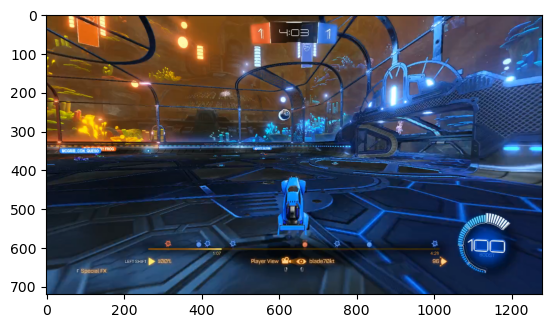

In [13]:
video = cv2.VideoCapture(r'D:\OBS\Videos\2023-03-06 21-39-13.mkv')
ret,frame = video.read()
print(frame.shape)
videoFPS = int(video.get(cv2.CAP_PROP_FPS))
print(videoFPS)
plt.figure()
plt.imshow(frame)
plt.show()

In [3]:
bounding_box = {'top':100, 'left': 0, 'width': 400, 'height': 300}
# sct = mss()

with mss.mss() as sct:
    mon = sct.monitors[0]
    while True:
        last_time = time.time()
        img = sct.grab(mon)
        # print('fps: {0}'.format(1 / (time.time()-last_time)))
        # cv2.imshow('test', np.array(img))
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break

fps: 12.6596038803069
fps: 12.48390217187486
fps: 14.536098480647665
fps: 15.15261340154044
fps: 16.66813969384349
fps: 18.850465609607017
fps: 17.84764644306954
fps: 21.27241835766923
fps: 17.235543574739474
fps: 16.390530602036748
fps: 20.40338767031994
fps: 18.378739346668713
fps: 20.659458873712573
fps: 18.497889699883128
fps: 21.253985466854495
fps: 19.21304596779735
fps: 16.13528963707847
fps: 19.60752268445583
fps: 17.524751813350267
fps: 18.176910842517195
fps: 16.915244394257137
fps: 18.868103789541873
fps: 17.13037582807152
fps: 19.603582044906428
fps: 19.159947010186833
fps: 17.2291716302035
fps: 20.411033032916123
fps: 16.647762994951258
fps: 16.559753319409513
fps: 20.048583460400465
fps: 17.46207872770041
fps: 21.110214106680893
fps: 19.226785362298244
fps: 14.924596043880967
fps: 17.543443435488392
fps: 16.392964902681154
fps: 19.999446884193762
fps: 20.597874555562104
fps: 16.394310484328035
fps: 19.60761434608624
fps: 17.847038899810226
fps: 21.749161260882868
fps: 18.

KeyboardInterrupt: 

[0.         0.06199265 0.11799216 0.16799164 0.21999288]


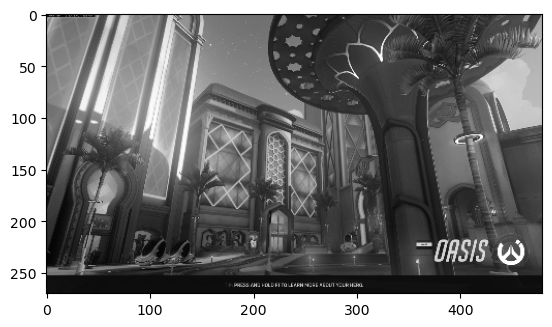

In [59]:
image_vec = []
times = []
i = 0
def myfunc(monitor_1,ints = 5,ival = 0):
    while ival <ints:
        screenshot = mss_instance.grab(monitor_1)
        size = np.array([screenshot.size[0],screenshot.size[1]])/4
        size = (int(size[0]),int(size[1]))
        img = np.array(Image.frombytes("RGB",screenshot.size,screenshot.bgra,"raw","BGRX"))
        image = cv2.resize(img,size,interpolation=cv2.INTER_LINEAR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image_vec.append(image)
        times.append(time.time())
        ival+=1

with mss.mss() as mss_instance:
    monitor_1 = mss_instance.monitors[2]
    s = sched.scheduler(time.time,time.sleep)
    s.enter(0.25,1,myfunc,argument=(monitor_1,5,i))
    s.run()
times = np.array(times)
print(times-times[0])

    # schedule.every(1).seconds.at(":00").do(myfunc)
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()